In [1]:
import sys
sys.path.append("..")
from tqdm.notebook import tqdm
import numpy as np
from mango.environments import frozen_lake
import utils_plot, utils_save, utils_sim

In [2]:
# parameters for the environment
map_scale = 2
p_frozen = None

# parameters for the training
N_episodes = 1000
train_steps_per_episode = 5
episode_length = 4**map_scale

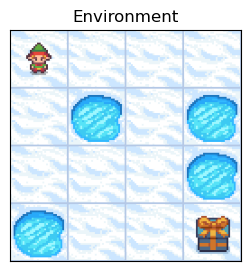

In [3]:
# create the environment and the option manager
dir_path = utils_save.path_to_save_dir(map_scale, p_frozen)
env = utils_sim.make_env(map_scale, p_frozen)
agent = utils_sim.make_agent(env, map_scale)
frozen_lake.plot_utils.plot_map(env)

In [4]:
# train loop
for iteration, randomness in enumerate(tqdm(np.linspace(1, 0, N_episodes))):
    randomness = 0.0 if iteration % 2 else randomness
    transitions = agent.run_episode(randomness, episode_length)
    for _ in range(train_steps_per_episode):
        agent.train()

  0%|          | 0/1000 [00:00<?, ?it/s]

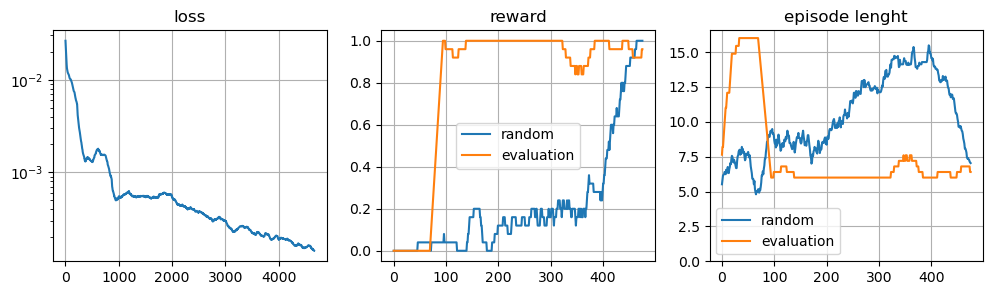

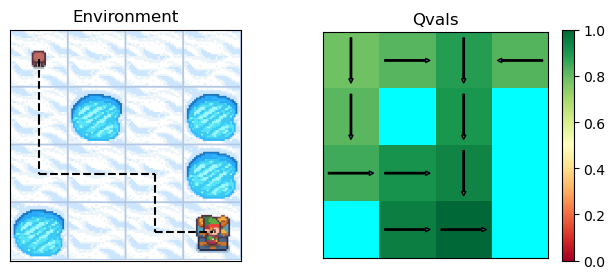

In [5]:
# plot results and save
utils_save.save_to_file(path=dir_path + f"/normal_agent.pickle", obj=agent)
utils_plot.plot_agent_loss_reward(agent, save_path=dir_path + f"/normal_agent_training.png")
agent.reset()
transitions = agent.run_episode(randomness=0.0, episode_length=episode_length)
trajectory = [t.start_obs for t in transitions] + [transitions[-1].next_obs]
frozen_lake.plot_utils.plot_all_qvals_agent(
    agent, trajectory, save_path=dir_path + f"/normal_agent_qvals.png"
)